In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
hourly=pd.read_csv("hourly")
daily=pd.read_csv("daily")
weather_daily=pd.read_csv("weather_daily.csv")
weather_hourly=pd.read_csv("weather_hourly.csv")

In [ ]:
#The most important weather indicators are temperature and windspeed. Humidity exhibits effects in extreme low/high values
#Average humidity in DC is 64%, relatively stable throught the year
#Feels like temperature (also known as heat index), combines temperature with humidity, 
#so it is extremely correlated with temperature, we may drop it

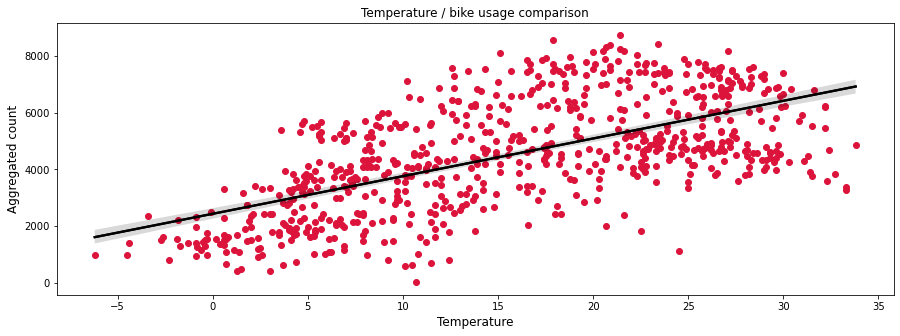

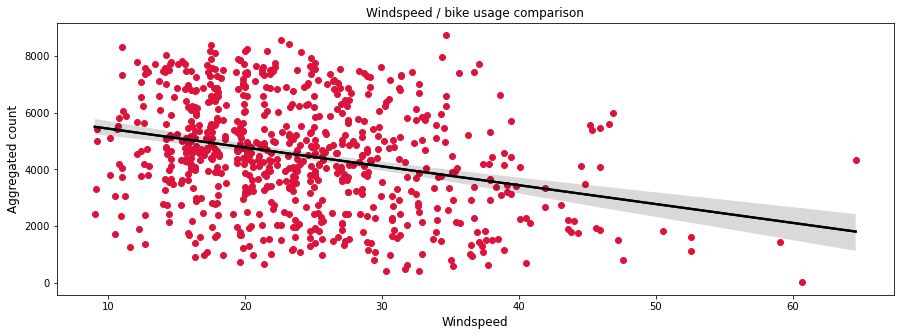

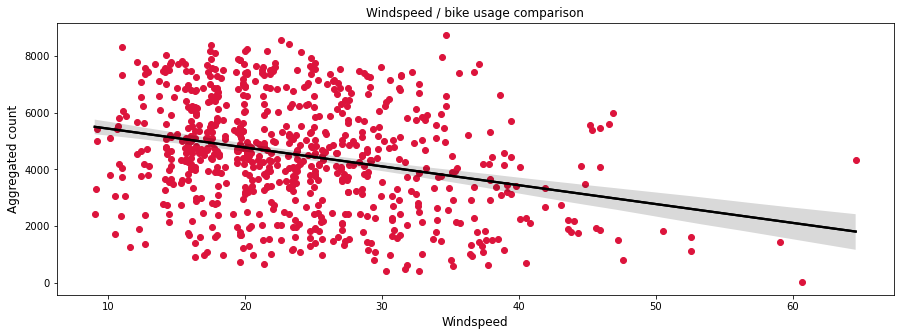

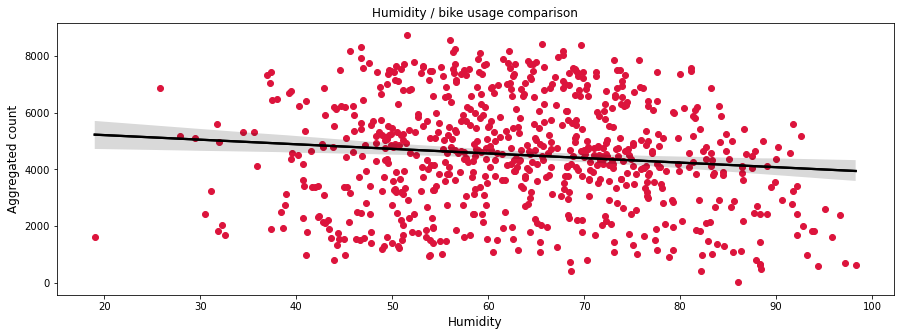

In [242]:
#Plots for presentation
#Temp-count
a=plt.scatter(x=daily["temp"],y=daily["cnt"],color="crimson")
a=sns.regplot(data=daily,x="temp",y="cnt",scatter=False,ci=95,fit_reg=True,color="black")
a=sns.regplot(data=daily,x="temp",y="cnt",scatter=False,ci=0,fit_reg=True,color="black")
plt.xlabel("Temperature")
plt.ylabel("Aggregated count")
plt.title("Temperature / bike usage comparison")
plt.show(a)
#Windspeed-count
a=plt.scatter(x=daily["windspeed"],y=daily["cnt"],color="crimson")
a=sns.regplot(data=daily,x="windspeed",y="cnt",scatter=False,ci=95,fit_reg=True,color="black")
a=sns.regplot(data=daily,x="windspeed",y="cnt",scatter=False,ci=0,fit_reg=True,color="black")
plt.xlabel("Windspeed")
plt.ylabel("Aggregated count")
plt.title("Windspeed / bike usage comparison")
plt.show(a)
#Humidity-count
a=plt.scatter(x=daily["windspeed"],y=daily["cnt"],color="crimson")
a=sns.regplot(data=daily,x="windspeed",y="cnt",scatter=False,ci=95,fit_reg=True,color="black")
a=sns.regplot(data=daily,x="windspeed",y="cnt",scatter=False,ci=0,fit_reg=True,color="black")
plt.xlabel("Windspeed")
plt.ylabel("Aggregated count")
plt.title("Windspeed / bike usage comparison")
plt.show(a)
#Humidity-count
a=plt.scatter(x=daily["hum"],y=daily["cnt"],color="crimson")
a=sns.regplot(data=daily,x="hum",y="cnt",scatter=False,ci=95,fit_reg=True,color="black")
a=sns.regplot(data=daily,x="hum",y="cnt",scatter=False,ci=0,fit_reg=True,color="black")
plt.xlabel("Humidity")
plt.ylabel("Aggregated count")
plt.title("Humidity / bike usage comparison")
plt.show(a)

In [243]:
#During working days, the rental distribution is fairly consistent throught the seasonal changes
#Same consistency for holidays/weekends
#Most people prefer to ride a bike in warmer weather (obv)
#2012 was a better year for CBS, irrespective of any other factors

[Text(0.5, 1.0, 'Seasonal distribution of total rentals'),
 Text(0.5, 0, 'Hour of the day'),
 Text(0, 0.5, 'Rental count')]

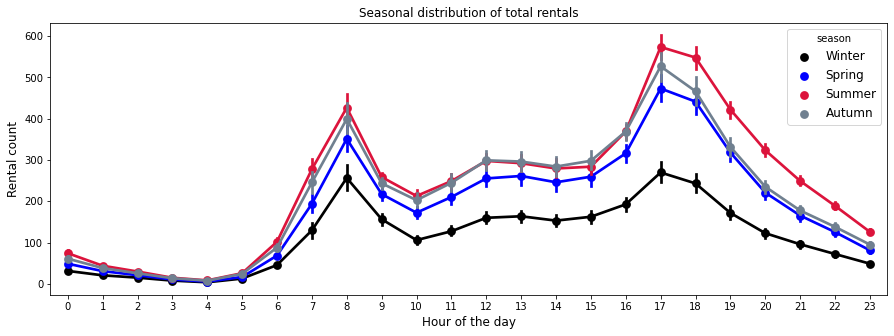

In [244]:
fig,ax=plt.subplots()
param={"legend.fontsize":"large","axes.labelsize":"large","axes.titlesize":"large","figure.figsize":(15,5)}
plt.rcParams.update(param)
colours=["black","blue","crimson","slategrey"]
sns.set_palette(sns.color_palette(colours))
sns.pointplot(data=hourly,x="hour",y="cnt",hue="season")
ax.set(title="Seasonal distribution of total rentals",xlabel="Hour of the day",ylabel="Rental count")

[Text(0.5, 1.0, 'Daily distribution of total rentals'),
 Text(0.5, 0, 'Hour of the day'),
 Text(0, 0.5, 'Rental count')]

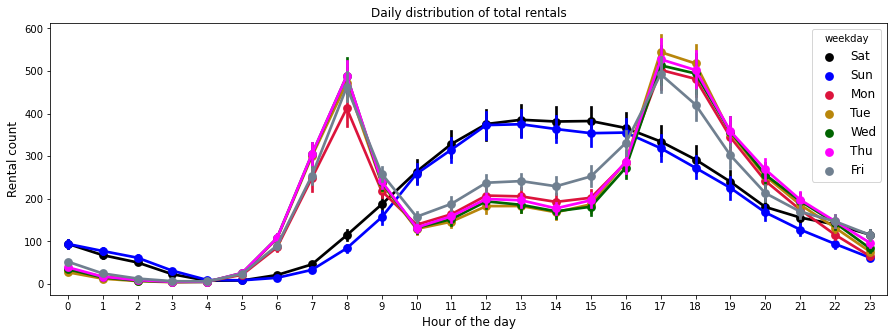

In [245]:
fig,ax=plt.subplots()
colours=["black","blue","crimson","darkgoldenrod","darkgreen","fuchsia","slategrey"]
sns.set_palette(sns.color_palette(colours))
sns.pointplot(data=hourly,x="hour",y="cnt",hue="weekday")
ax.set(title="Daily distribution of total rentals",xlabel="Hour of the day",ylabel="Rental count")

[Text(0.5, 1.0, 'Distribution of total rentals depending on holidays'),
 Text(0.5, 0, 'Hour of the day'),
 Text(0, 0.5, 'Rental count')]

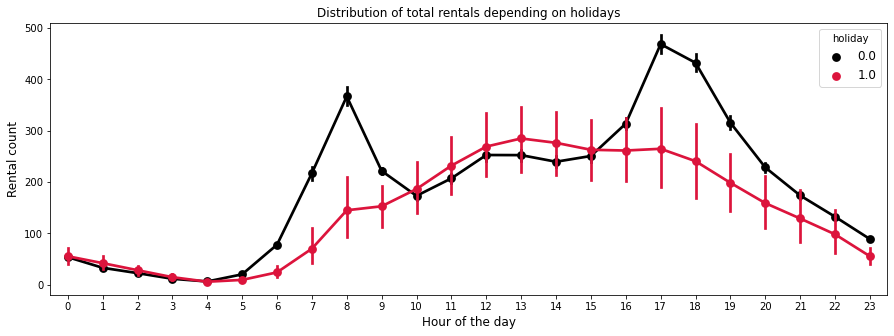

In [246]:
fig,ax=plt.subplots()
colours=["black","crimson"]
sns.set_palette(sns.color_palette(colours))
sns.pointplot(data=hourly,x="hour",y="cnt",hue="holiday")
ax.set(title="Distribution of total rentals depending on holidays",xlabel="Hour of the day",ylabel="Rental count")

[Text(0.5, 1.0, 'Rental distribution based on weather conditions'),
 Text(0.5, 0, 'Weather condition'),
 Text(0, 0.5, 'Rental count')]

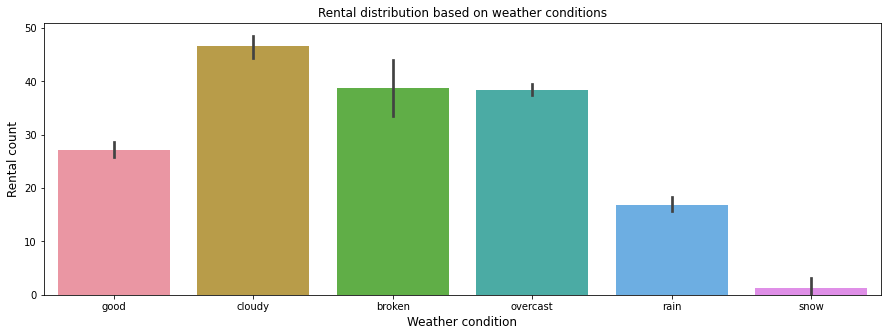

In [255]:
fig,ax=plt.subplots()
order=["good","cloudy","broken","overcast","rain","snow"]
sns.barplot(data=hourly,x="weather",y="casual",order=order)
ax.set(title="Rental distribution based on weather conditions",xlabel="Weather condition",ylabel="Rental count")

[Text(0.5, 1.0, 'Rental distribution based on weather conditions'),
 Text(0.5, 0, 'Weather condition'),
 Text(0, 0.5, 'Rental count')]

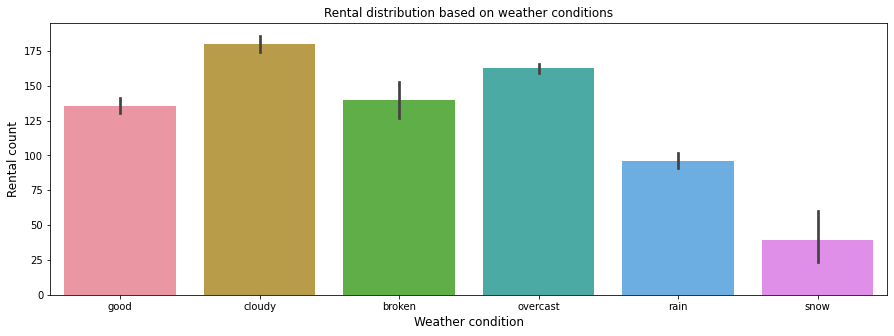

In [256]:
fig,ax=plt.subplots()
order=["good","cloudy","broken","overcast","rain","snow"]
sns.barplot(data=hourly,x="weather",y="registered",order=order)
ax.set(title="Rental distribution based on weather conditions",xlabel="Weather condition",ylabel="Rental count")

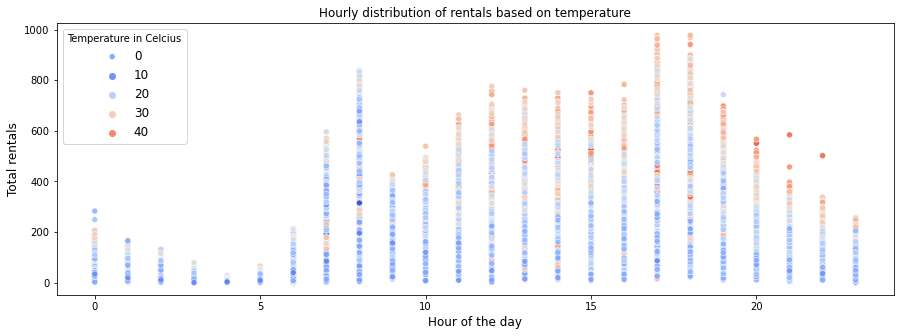

In [248]:
fig,ax=plt.subplots()
sns.scatterplot(data=hourly,x="hour",y="cnt",hue="temp",palette="coolwarm")
ax.set(title="Hourly distribution of rentals based on temperature",xlabel="Hour of the day",ylabel="Total rentals")
plt.legend(title="Temperature in Celcius", labels=[0,10,20,30,40])

[Text(0.5, 1.0, 'Yearly distribution of rentals'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Total rentals')]

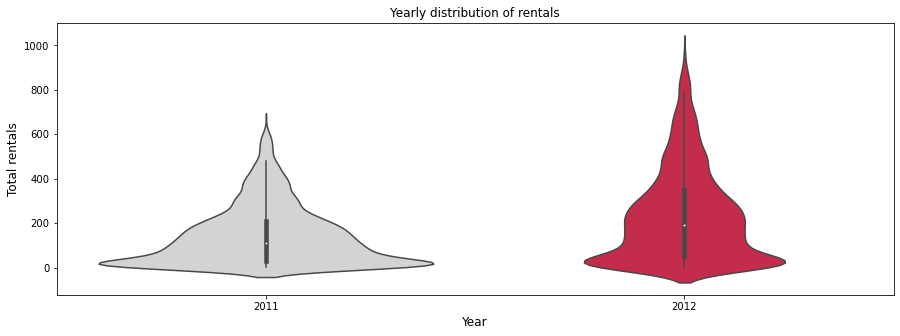

In [249]:
fig,ax=plt.subplots()
colours=["lightgrey","crimson"]
sns.set_palette(sns.color_palette(colours))
sns.violinplot(data=hourly,x="year",y="cnt")
ax.set(title="Yearly distribution of rentals",xlabel="Year",ylabel="Total rentals")

[Text(0.5, 0, 'Temperature'),
 Text(1.5, 0, 'Heat index'),
 Text(2.5, 0, 'Humidity'),
 Text(3.5, 0, 'Windspeed'),
 Text(4.5, 0, 'Casual'),
 Text(5.5, 0, 'Registered'),
 Text(6.5, 0, 'Total count')]

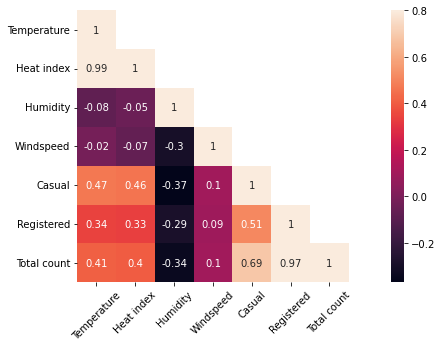

In [250]:
corr=hourly[["temp","ftemp","hum","windspeed","casual","registered","cnt"]].corr().round(2)
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
labels=["Temperature","Heat index","Humidity","Windspeed","Casual","Registered","Total count"]
fig,ax=plt.subplots()
ax=sns.heatmap(corr,mask=mask,vmax=.8,square=True,annot=True,yticklabels=labels)
ax.set_xticklabels(labels,rotation=45)